In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [3]:
observations = 1000
xs=np.random.uniform(low=-10, high=10, size=(observations, 1))
zs=np.random.uniform(low=-10, high=10, size=(observations, 1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,size=(observations, 1))

generated_targets = 2*xs - 3*zs + 5 + noise

print(generated_targets.shape)


np.savez('TF_intro', inputs=generated_inputs , targets = generated_targets)

(1000, 1)


In [4]:
traning_data = np.load('TF_intro.npz')

Create Model

In [23]:
input_size =2
output_size = 1


model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
                         kernel_initializer = tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
                         bias_initializer = tf.random_uniform_initializer(minval=-0.1,maxval=0.1)                         
                         )
    
])

Objective function and optimization algorithm


In [24]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [25]:
model.fit(traning_data['inputs'] , traning_data['targets'], epochs=100, verbose=1)

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 0s 265us/sample - loss: 23.9999
Epoch 2/100
1000/1000 [==============================] - 0s 38us/sample - loss: 1.4551
Epoch 3/100
1000/1000 [==============================] - 0s 38us/sample - loss: 0.4502
Epoch 4/100
1000/1000 [==============================] - 0s 42us/sample - loss: 0.3723
Epoch 5/100
1000/1000 [==============================] - 0s 40us/sample - loss: 0.3835
Epoch 6/100
1000/1000 [==============================] - 0s 43us/sample - loss: 0.3781
Epoch 7/100
1000/1000 [==============================] - 0s 40us/sample - loss: 0.3868
Epoch 8/100
1000/1000 [==============================] - 0s 40us/sample - loss: 0.4267
Epoch 9/100
1000/1000 [==============================] - 0s 38us/sample - loss: 0.3821
Epoch 10/100
1000/1000 [==============================] - 0s 46us/sample - loss: 0.3860
Epoch 11/100
1000/1000 [==============================] - 0s 38us/sample - loss: 0.3942
Epoch 12/100
1000

Epoch 94/100
1000/1000 [==============================] - 0s 35us/sample - loss: 0.4340
Epoch 95/100
1000/1000 [==============================] - 0s 41us/sample - loss: 0.3824
Epoch 96/100
1000/1000 [==============================] - 0s 38us/sample - loss: 0.4089
Epoch 97/100
1000/1000 [==============================] - 0s 38us/sample - loss: 0.3842
Epoch 98/100
1000/1000 [==============================] - 0s 41us/sample - loss: 0.3769
Epoch 99/100
1000/1000 [==============================] - 0s 39us/sample - loss: 0.3660
Epoch 100/100
1000/1000 [==============================] - 0s 35us/sample - loss: 0.3727


In [26]:
model.layers[0].get_weights()

[array([[ 1.9799168],
        [-3.0518997]], dtype=float32), array([5.039143], dtype=float32)]

In [27]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.9799168],
       [-3.0518997]], dtype=float32)

In [28]:
biases = model.layers[0].get_weights()[1]
biases

array([5.039143], dtype=float32)

make predictions

In [29]:
outputs = model.predict_on_batch(traning_data['inputs'] )
outputs

<tf.Tensor: id=20137, shape=(1000, 1), dtype=float32, numpy=
array([[ 1.46893072e+00],
       [ 2.47215805e+01],
       [ 2.37515888e+01],
       [-1.91730404e+01],
       [ 9.25823021e+00],
       [ 1.22691803e+01],
       [ 2.29462452e+01],
       [-4.98758316e-01],
       [-1.30397415e+01],
       [ 1.03475056e+01],
       [-2.17711048e+01],
       [-2.15565834e+01],
       [-5.19568586e+00],
       [-2.03867188e+01],
       [-6.83062696e+00],
       [ 2.68646030e+01],
       [-3.73849983e+01],
       [ 4.01353874e+01],
       [-4.42147970e+00],
       [ 7.76505995e+00],
       [ 2.19258289e+01],
       [ 2.44181557e+01],
       [ 3.71884193e+01],
       [ 2.20353661e+01],
       [ 2.77203417e+00],
       [ 8.27236938e+00],
       [ 3.11132774e+01],
       [-1.26764431e+01],
       [-2.58683319e+01],
       [ 3.44324379e+01],
       [ 1.60027103e+01],
       [-1.40085697e+01],
       [-2.38706093e+01],
       [ 2.58633900e+01],
       [ 3.29127274e+01],
       [ 1.42785282e+01],
   

In [30]:
traning_data['targets'] 

array([[  1.85688047],
       [ 23.28024237],
       [ 23.99117809],
       [-19.1775144 ],
       [  9.56322062],
       [ 12.56073315],
       [ 23.46015874],
       [ -1.04832911],
       [-13.03951184],
       [ 10.92947391],
       [-20.71521303],
       [-22.28483581],
       [ -5.75231144],
       [-20.65957182],
       [ -5.47322227],
       [ 26.46181578],
       [-37.16611957],
       [ 40.35400085],
       [ -3.81114395],
       [  7.28956398],
       [ 20.69996483],
       [ 24.46929523],
       [ 37.46963911],
       [ 22.18886717],
       [  2.3941165 ],
       [  7.5163952 ],
       [ 31.58710417],
       [-12.37258673],
       [-25.82984317],
       [ 34.59688573],
       [ 16.40699985],
       [-13.33487082],
       [-24.36400001],
       [ 24.76592717],
       [ 31.88732824],
       [ 14.76851635],
       [ -2.30608737],
       [ -8.08096539],
       [  0.45224437],
       [-20.70948011],
       [-17.36193662],
       [  2.74599878],
       [ 15.56287686],
       [ 20

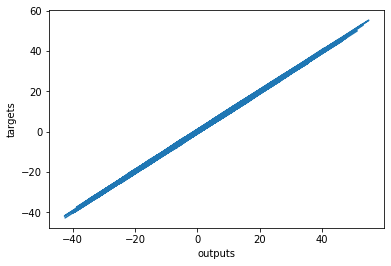

In [31]:
plt.plot(outputs, traning_data['targets'] )
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()